## Plotting with Pandas  
- Matplotlib Styles
- DataFrame.Plot   
  - hist, boxplot, scatter , kernel density plots 
  - mapping size and color aesthetics in scatter to variables, use of colormap 
- Pandas Plotting Tools (pd.plotting) 
  - Visualizing multivariate data / high dimensional data 
    - ScatterMatrix  
    - parallel_coordinates 
    - Others (autocorrelation plots, lag plots)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

#### Matplotlib Styles  
- Pandas uses matplotlib at the backend, setting a style applies the changes to plots from pandas api

In [3]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2']

In [4]:
plt.style.use('seaborn-colorblind')

### DataFrame.plot  
- Pandas visualization for data frame and series objects, fast and easy 

In [5]:
np.random.seed(321)
x = np.random.randn(365).cumsum() + 20 
y = np.random.randn(365).cumsum() - 20 
z = np.random.randn(365).cumsum()
i = pd.date_range(start = '2017/01/01',periods= 365,freq= 'D')
df = pd.DataFrame({'x' : x, 'y' : y, 'z' : z}, index = i)

In [6]:
df.head()

,x,y,z
2017-01-01,20.172519,-20.007234,1.510469
2017-01-02,21.808002,-17.147756,3.157034
2017-01-03,21.845338,-17.277218,3.651030
2017-01-04,20.961189,-17.975350,3.818552
2017-01-05,19.817996,-18.372007,5.133156


- Use of colors per palette chosen. 
- Pandas calls plt.plot()   
- Returns an exes object, which can be used to make changes like in pyplot

<IPython.core.display.Javascript object>


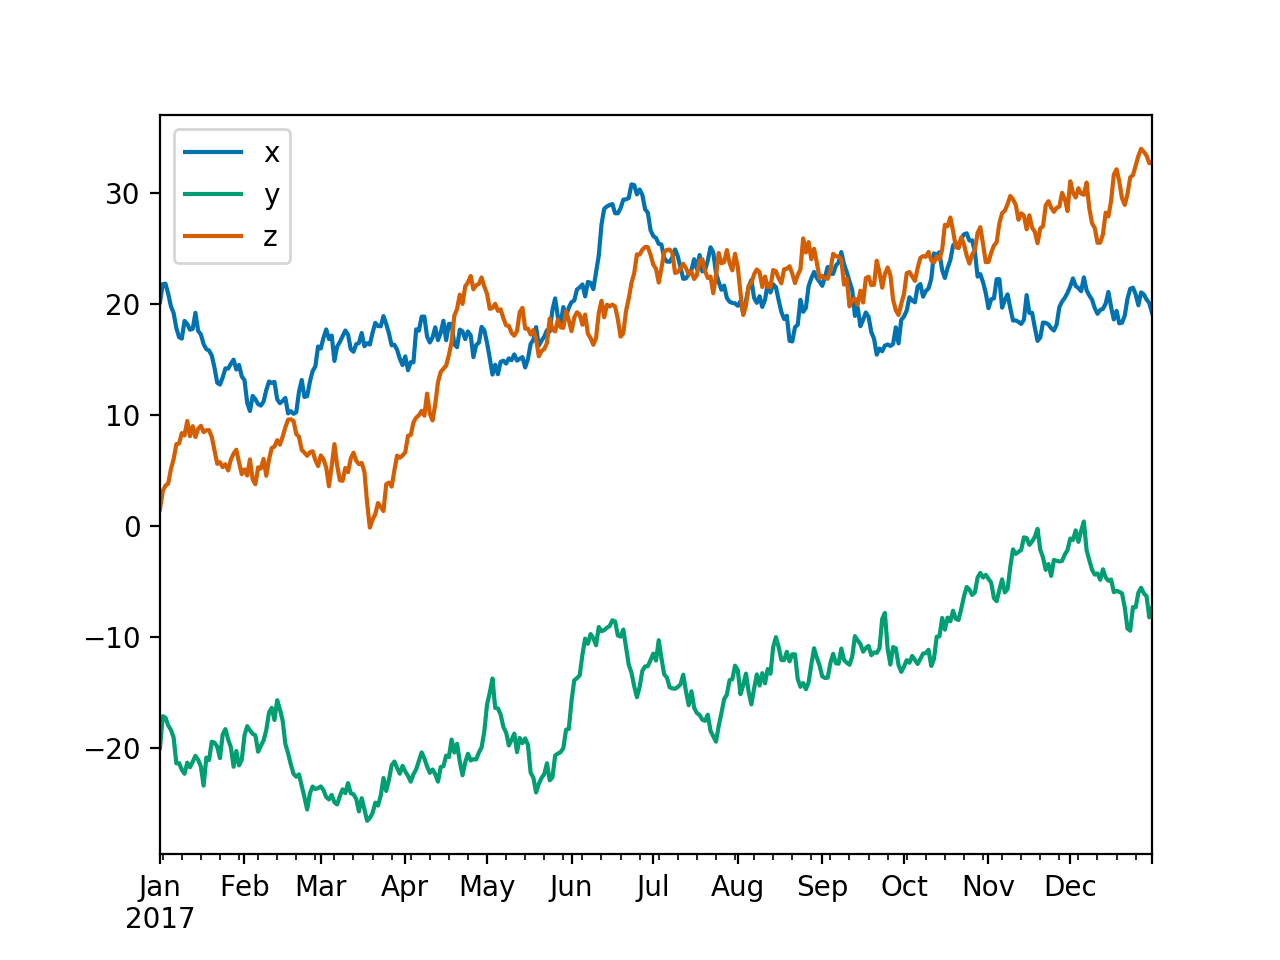

In [7]:
df.plot()

##### All other plots supported using kind argument or just a dot method

<IPython.core.display.Javascript object>


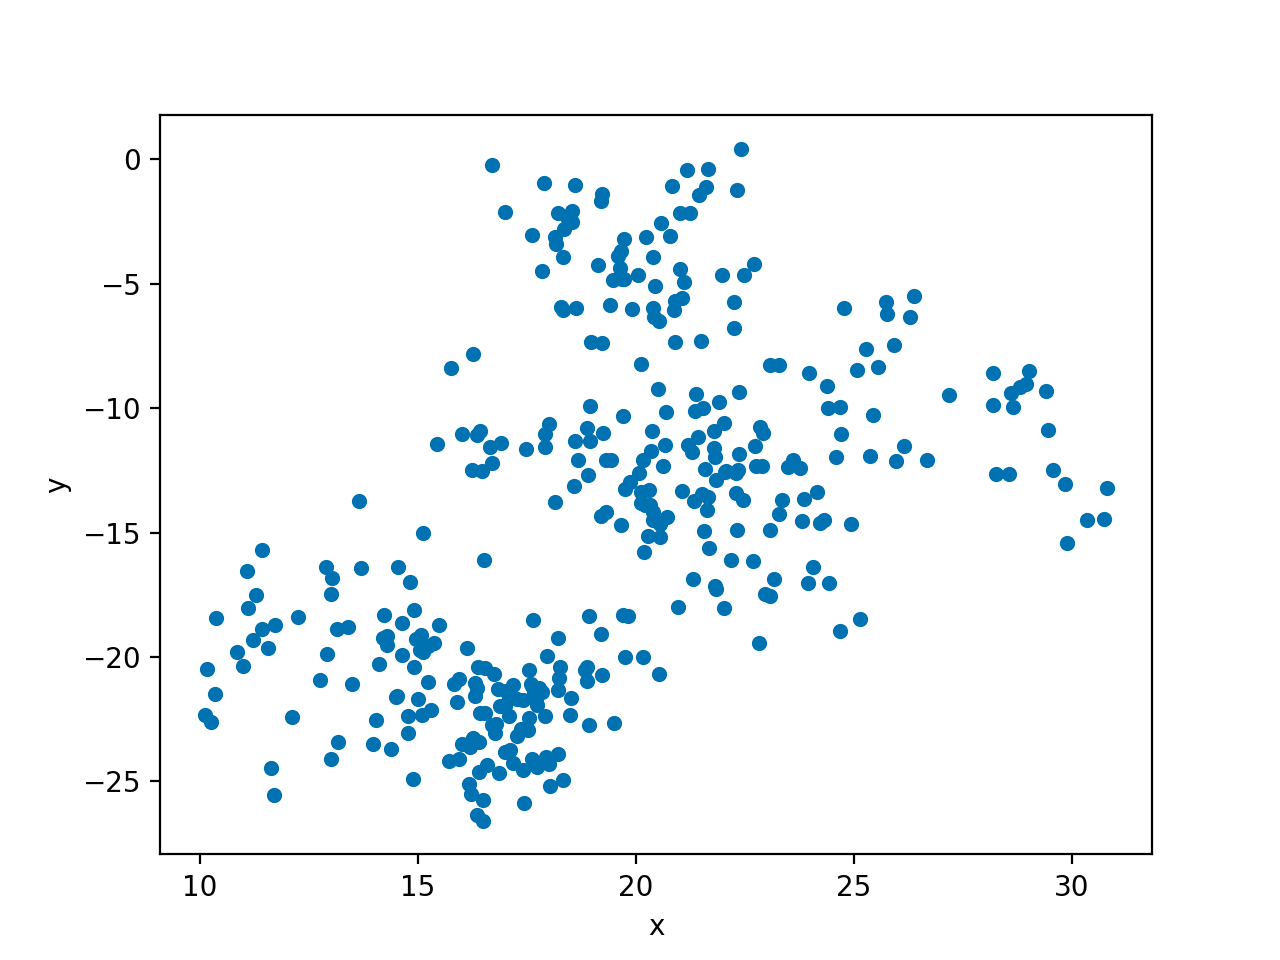

In [8]:
df.plot('x', 'y',kind= 'scatter')

#### Using color and size dimensions in a plot  
- Note the use of column names in string format

<IPython.core.display.Javascript object>


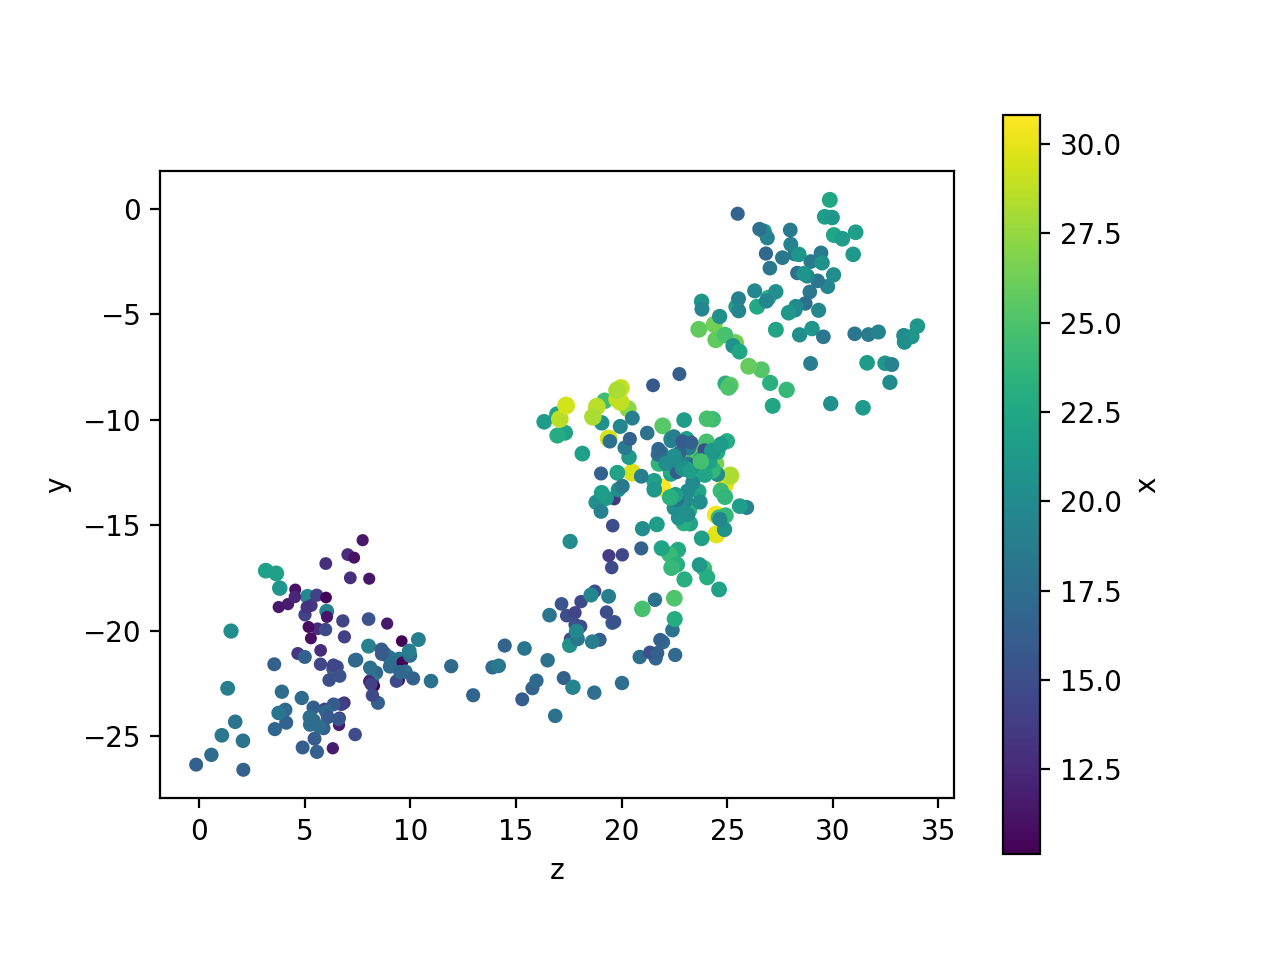

In [20]:
ax = df.plot.scatter('z','y',s = df['x'], c = 'x', colormap = 'viridis')

##### Utilize axes object - Are range of x and y equal?

In [24]:
ax.set_aspect('equal') # z is longer

#### Other plots 
- histograms 
- boxplots 
- kernel density plots 

<IPython.core.display.Javascript object>


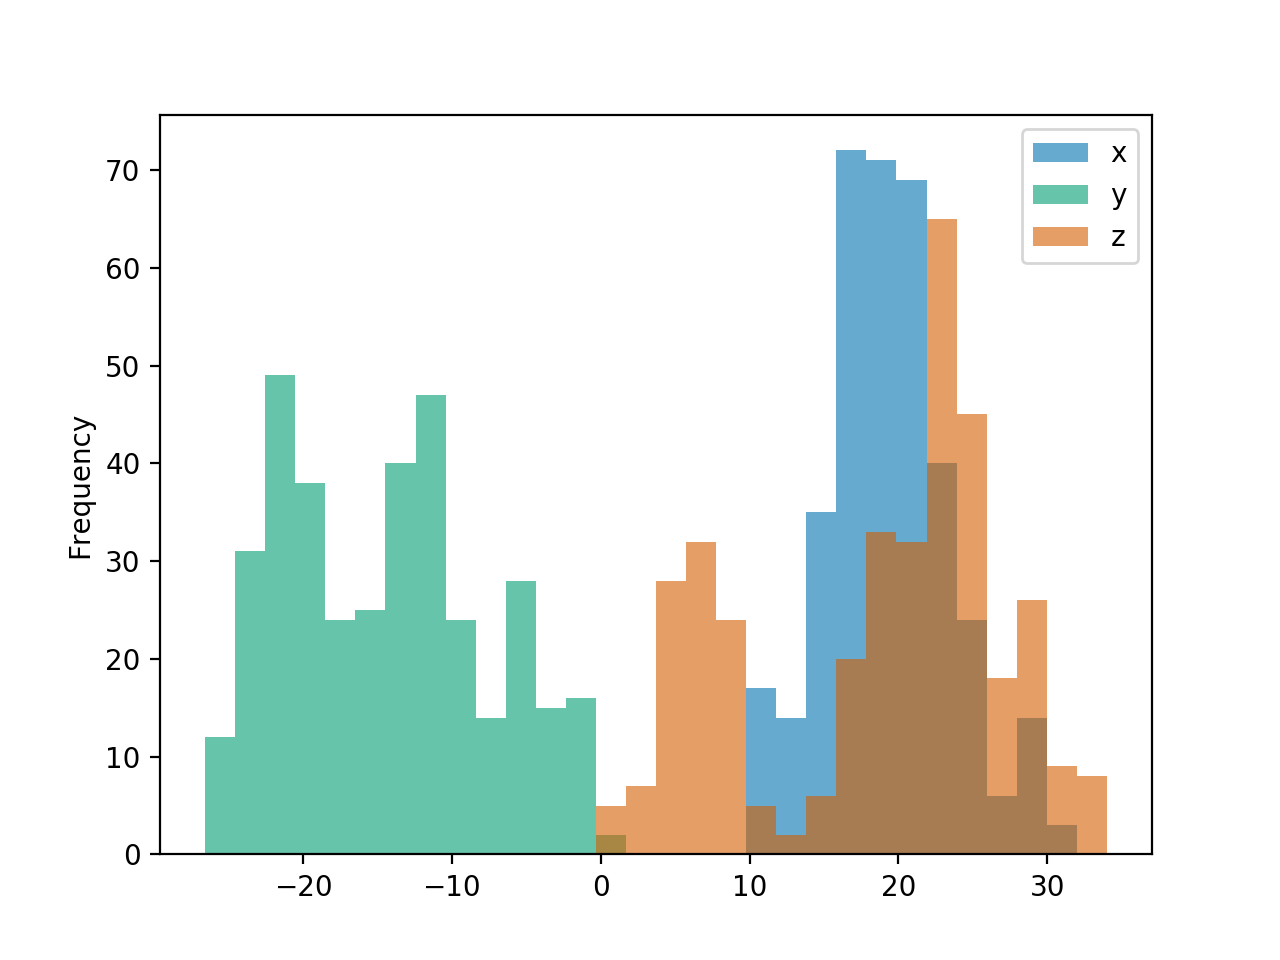

In [27]:
df.plot.hist(alpha = 0.6,bins= 30)

<IPython.core.display.Javascript object>


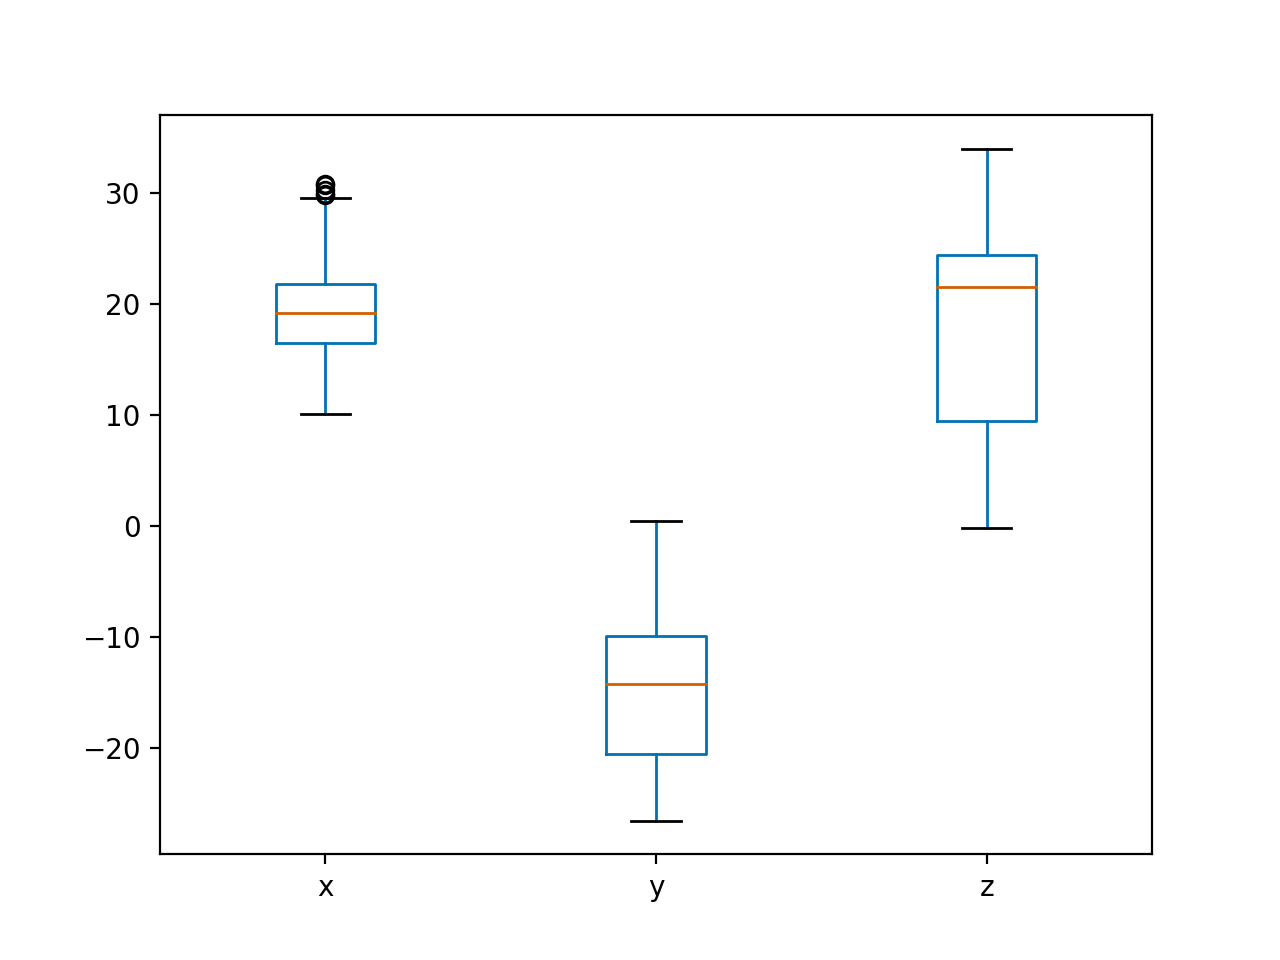

In [28]:
df.plot.box()

#### Kernel density estimate plots are useful to derive a smooth continuous approximate function from data

<IPython.core.display.Javascript object>


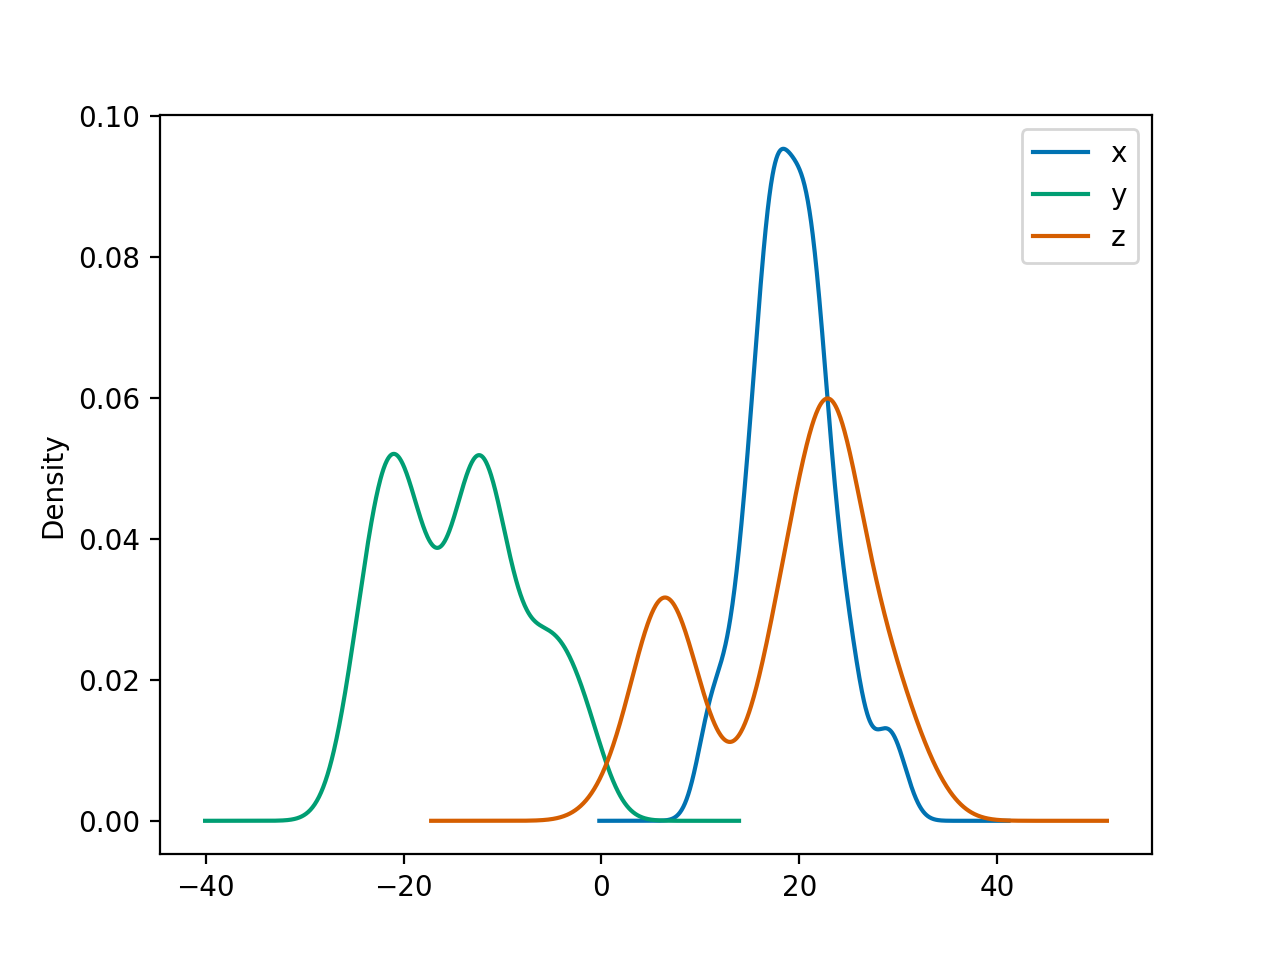

In [30]:
df.plot.kde()

#### pd.plotting

In [40]:
df = pd.read_csv('/Users/sumad/Documents/DS/Python/UM Spcialization/Applied_Plotting/iris.csv')

#### Multivariate plot with individual distribution and scatter  
- can see some distinct groups that emerge by using 2 variables at a time 

<IPython.core.display.Javascript object>


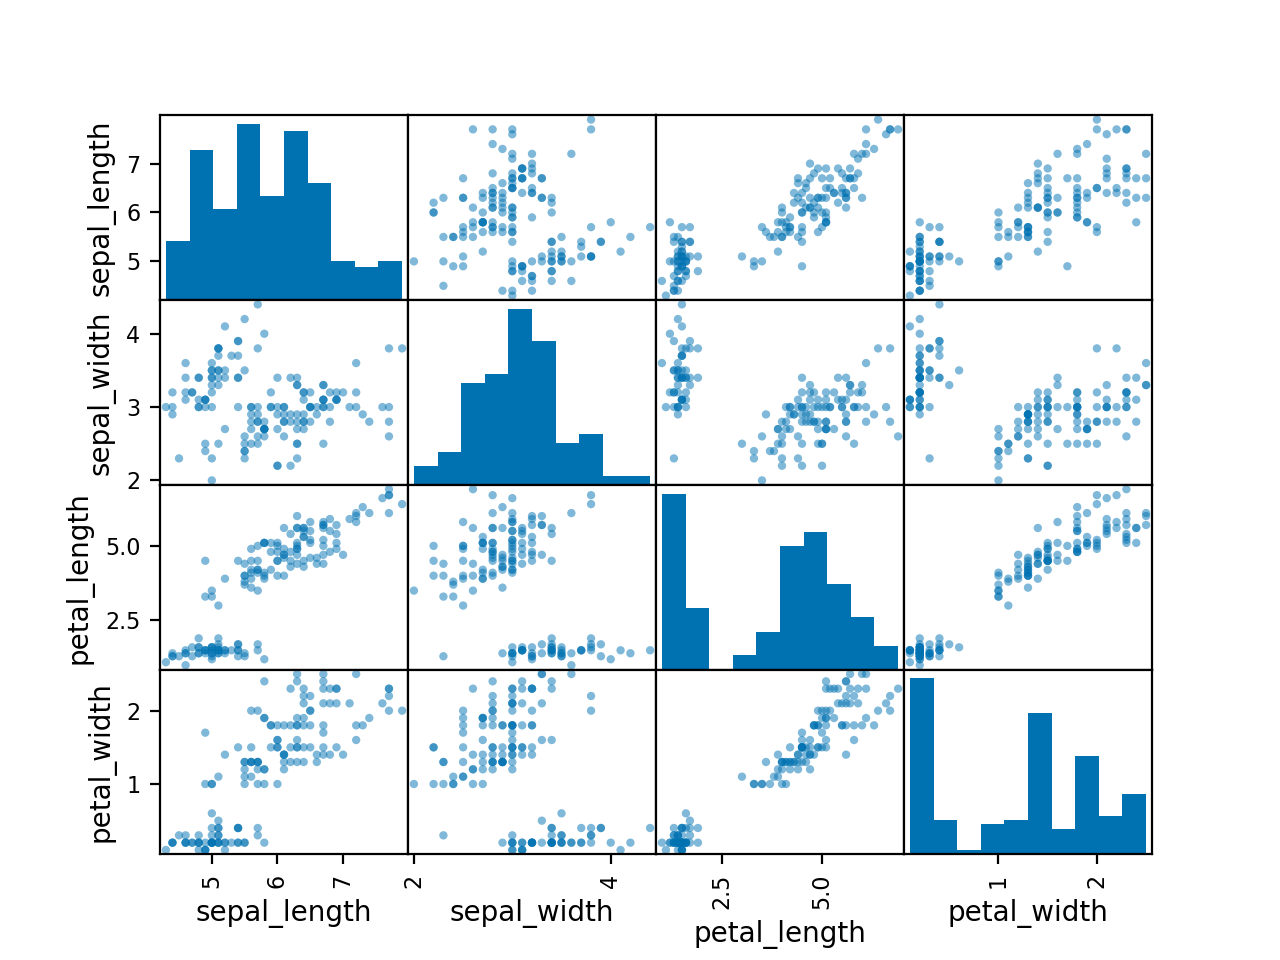

In [53]:
pd.plotting.scatter_matrix(df);

##### parallel_coordinates  
- Puts columns equally spaced vertical lines on x axis, and connects each record by joining values across 
  the lines. 
  - useful to look at high dimensional data and find clustering optys.  
  - or visualize clustering results

<IPython.core.display.Javascript object>


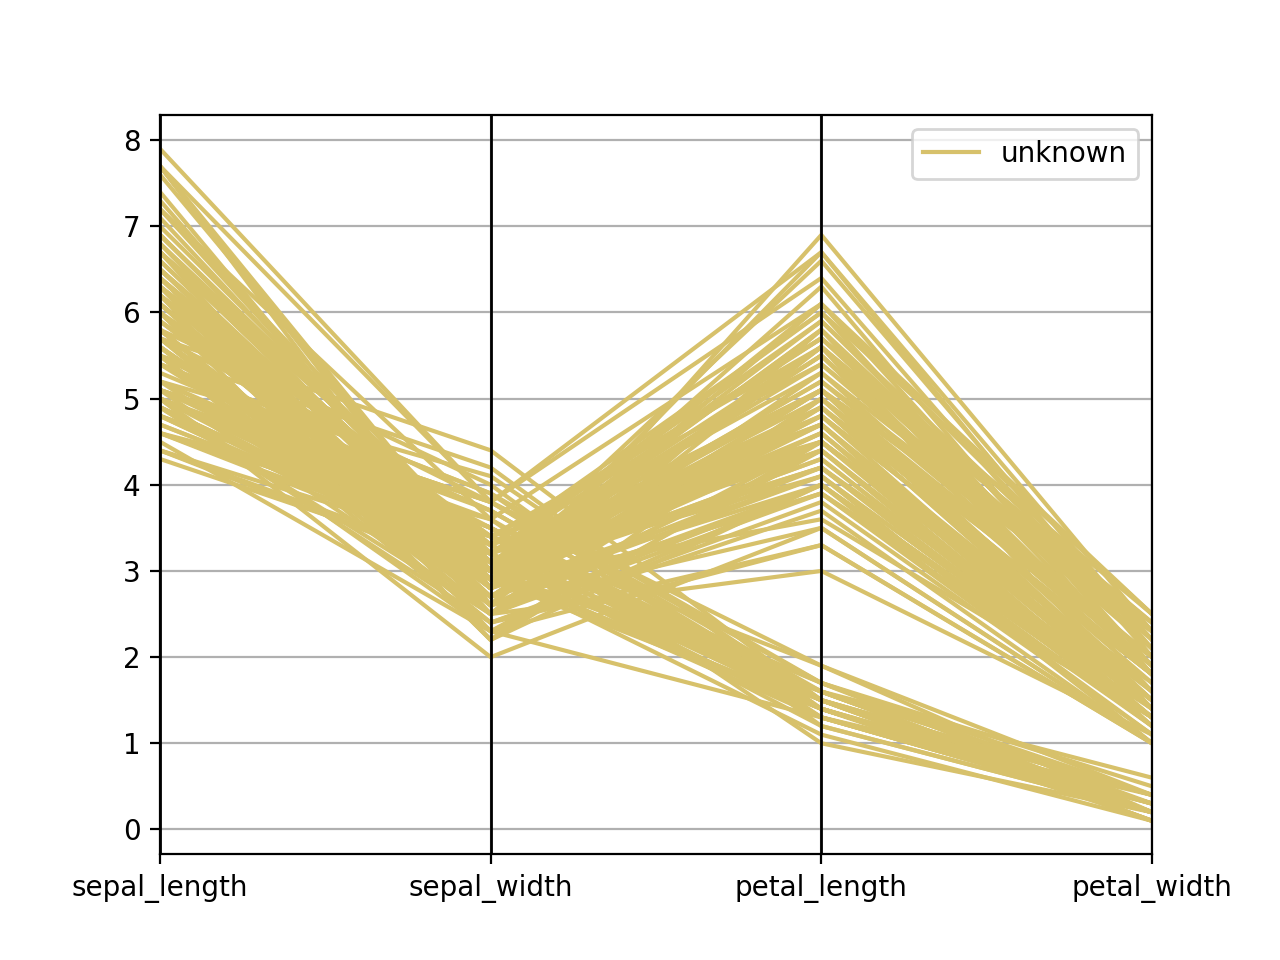

In [60]:
df2 = df.drop('species',axis= 'columns')
df2['name'] = 'unknown'
plt.figure()
pd.plotting.parallel_coordinates(df2,class_column= 'name')

<IPython.core.display.Javascript object>


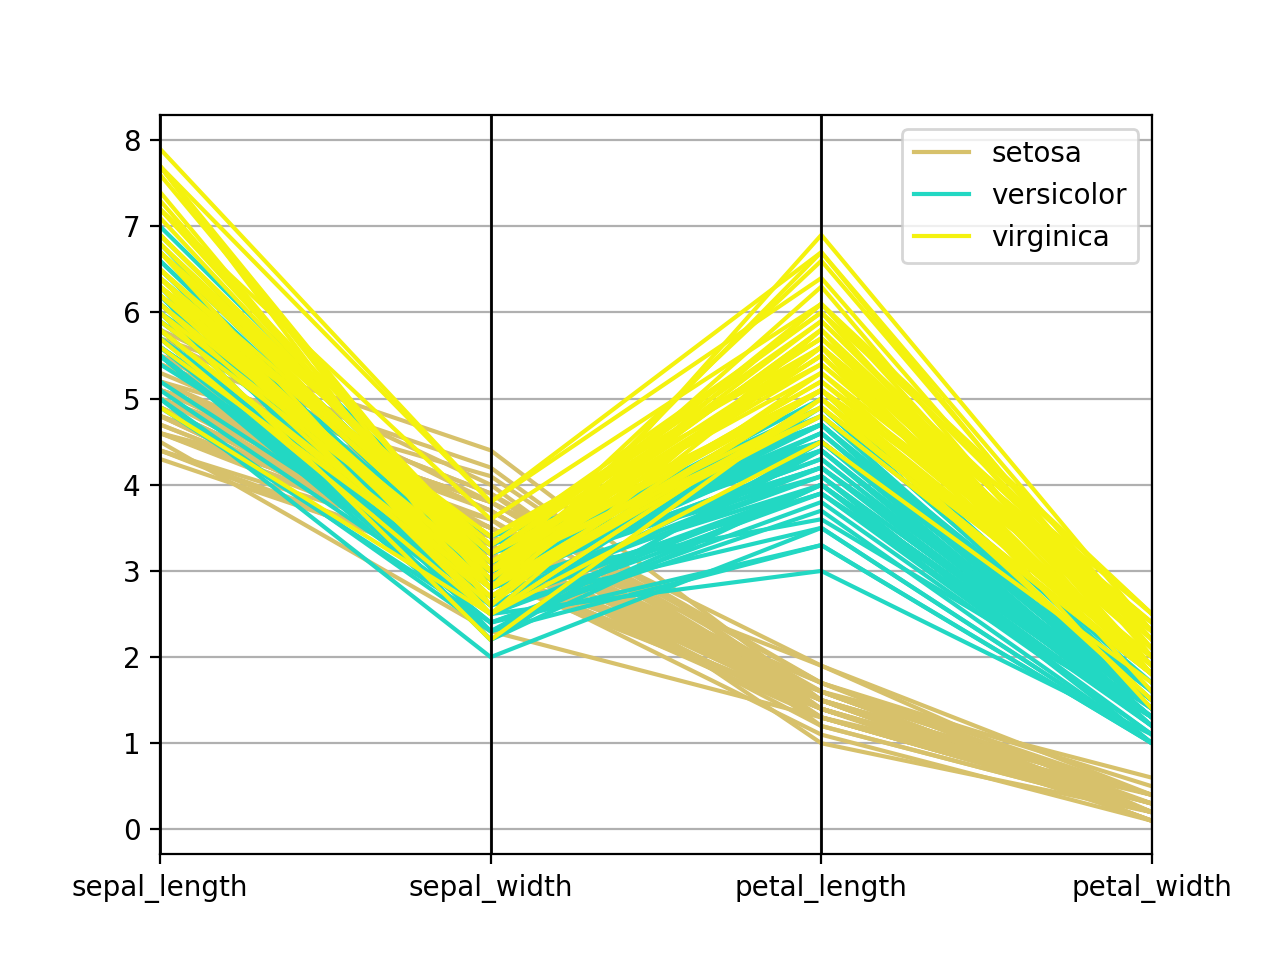

In [61]:
plt.figure()
pd.plotting.parallel_coordinates(df,class_column= 'species') # class column is a categorical variable used to
# color